<a href="https://www.kaggle.com/code/prayasjadaun/appliances-energy-prediction?scriptVersionId=147741656" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Overview:

For this project, I have a dataset with various columns related to energy consumption and environmental conditions. The goal of this project could be to analyze and visualize the data to gain insights into energy usage and the factors that influence it. You can explore trends, correlations, and patterns in the data to inform decision-making or predictions.

## Description:

The dataset contains information related to energy consumption (Appliances and lights), temperature (T1 to T9), relative humidity (RH_1 to RH_9), weather conditions (T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint), and two additional columns (rv1 and rv2).

## Summary:

The dataset appears to capture information related to a household's energy consumption and the environmental conditions affecting it. You can conduct various data analysis and visualization tasks to extract meaningful insights and patterns from the data.

## DataSet Information:

##### 1. Columns: The dataset consists of 29 columns.
##### 2. Date: The date and time of data collection.
##### 3. Appliances: Energy usage in Wh (target variable for prediction).
##### 4. Lights: Energy usage of light fixtures in the house in Wh(Watt-hour).
##### 5. T1 to T9: Temperature in different areas of the house in Celsius.
##### 6. RH_1 to RH_9: Relative humidity in different areas of the house.
##### 7. T_out: Outdoor temperature.
##### 8. Press_mm_hg: Pressure in mm Hg.
##### 9. RH_out: Outdoor relative humidity.
##### 10. Windspeed: Windspeed.
##### 11. Visibility: Visibility.
##### 12. Tdewpoint: Dew point temperature.
##### 13. rv1: Random variable 1.
##### 14. rv2: Random variable 2.

### Attribute Information:

The columns in the dataset represent various attributes related to energy usage, environmental conditions, and time. Each attribute provides specific information that can be used for analysis and visualization.

This project offers a great opportunity to apply data analysis and visualization techniques to extract valuable insights from the dataset and make data-driven decisions.

## Project Outline

# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from scipy.stats import norm
import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline


import os
for dirname, _, filenames in os.walk('/kaggle/input/appliances-energy-predictions/energydata_complete(Project).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 2.Read Data

In [2]:
df = pd.read_csv('/kaggle/input/appliances-energy-predictions/energydata_complete(Project).csv')
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

* Initial Observation
   * No Null values
   * 19735 rows and 29 features
   *  All our numerical features
   * Dataset contains temperature, humidity and weather information.
   * 2 random variable variable(non-dimensional) are given to filter non-predictive attributes.

### Describe Data 

In [4]:
df.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634


In [5]:
# Check if any rows are duplicated!

print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [6]:
# Check if any columns are duplicated!
temp_df = df.copy()
cols = temp_df.columns.tolist()

# rv1, rv2 are the same! TODO: Check if it has any impact on model performance
print(f'Duplicate columns: {temp_df.T.duplicated().sum()}')

Duplicate columns: 1


### Treat DateTime Feature

In [7]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,hour,minute
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,11,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,11,17,10
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,11,17,20
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,11,17,30
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,11,17,40


### 3. Exploratory Data Analysis

In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

## Data Visualization:

Co-Relation for all columns

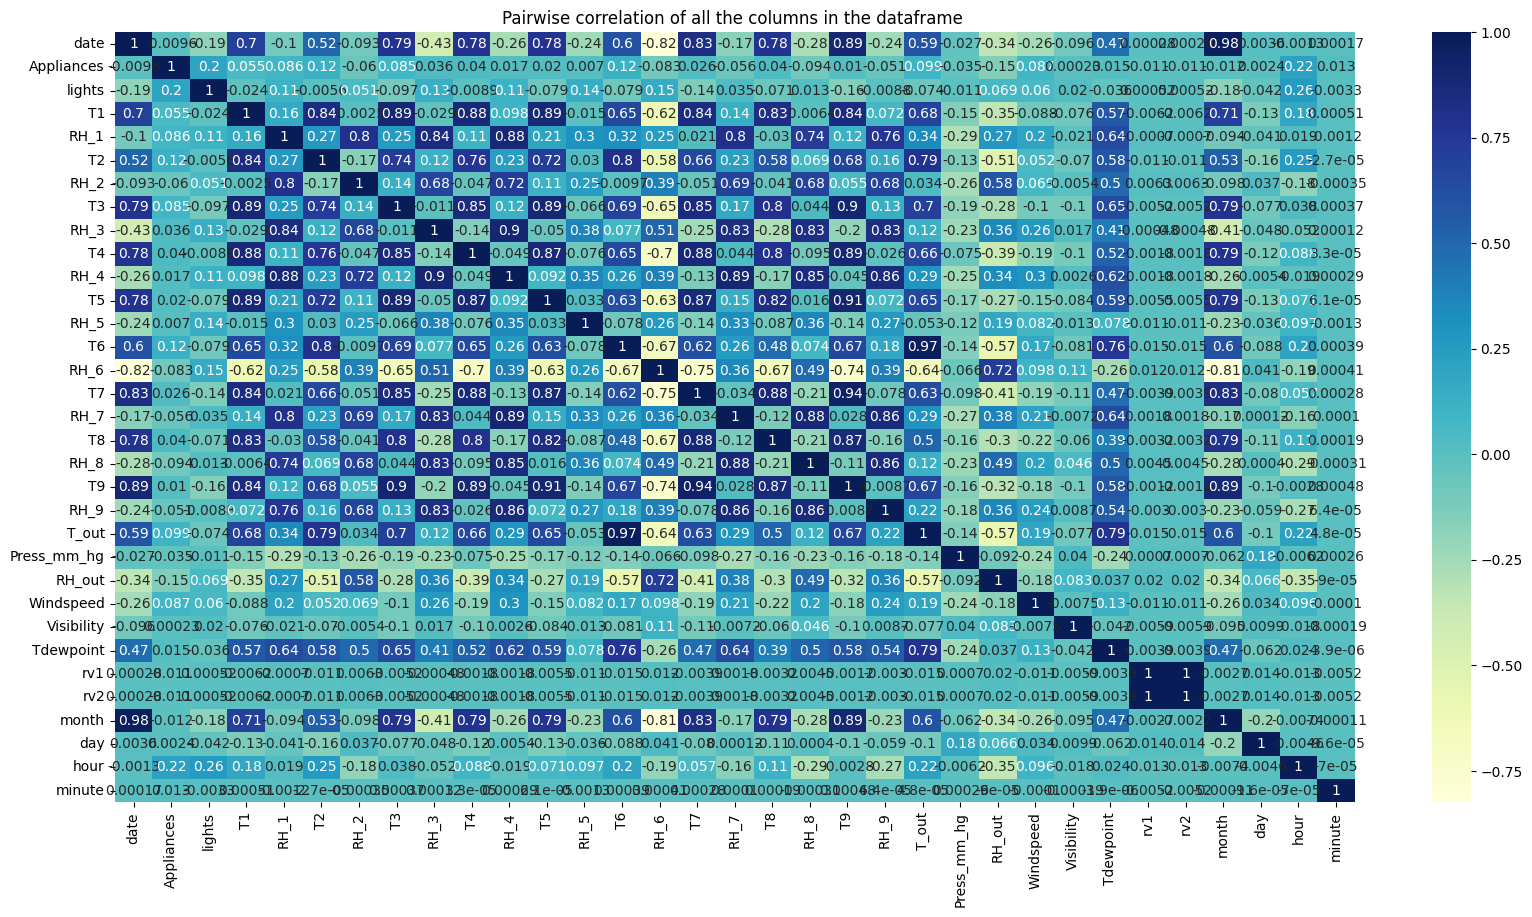

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(), cmap="YlGnBu", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

### 4. Histogram for Appliances energy consumption:

<Axes: ylabel='Frequency'>

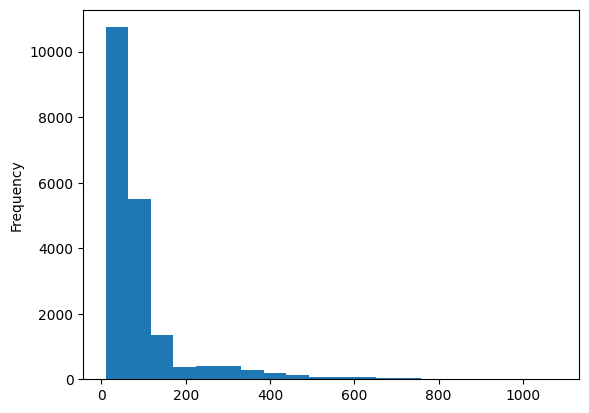

In [10]:
df['Appliances'].plot(kind='hist', bins=20)

Use this to understand the distribution of energy consumption.

### 5. Line plot for Lights energy consumption:

<Axes: >

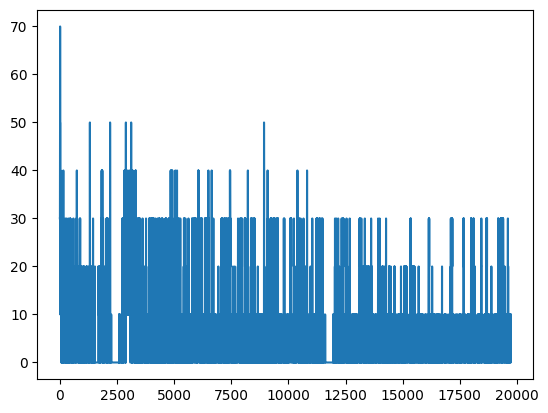

In [11]:
df['lights'].plot(kind='line')

Visualize how energy consumption varies with time.

### 6. Scatter plot for T1 vs. RH_1:

<Axes: xlabel='T1', ylabel='RH_1'>

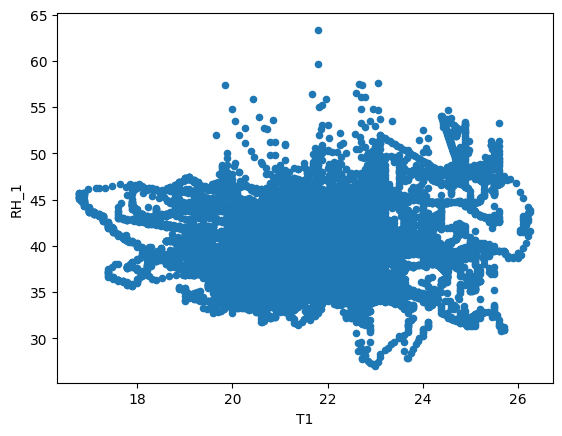

In [12]:
df.plot(x='T1', y='RH_1', kind='scatter')

Explore the relationship between outdoor temperature and energy usage.

### Scatter plot for Outdoor Temperature vs. Appliances energy:

<Axes: xlabel='T_out', ylabel='Appliances'>

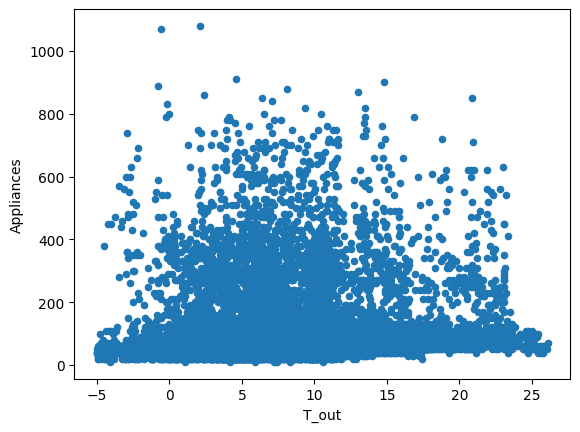

In [13]:
df.plot(x='T_out', y='Appliances', kind='scatter')

### 7. Box plot for temperatures (T1 to T9):

<Axes: >

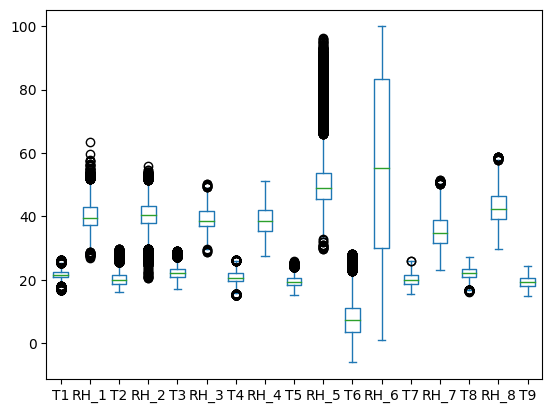

In [14]:
df.loc[:, 'T1':'T9'].plot(kind='box')

Analyze the distribution of temperatures in different areas of the house.

### 8. Correlation heatmap between all columns:

<Axes: >

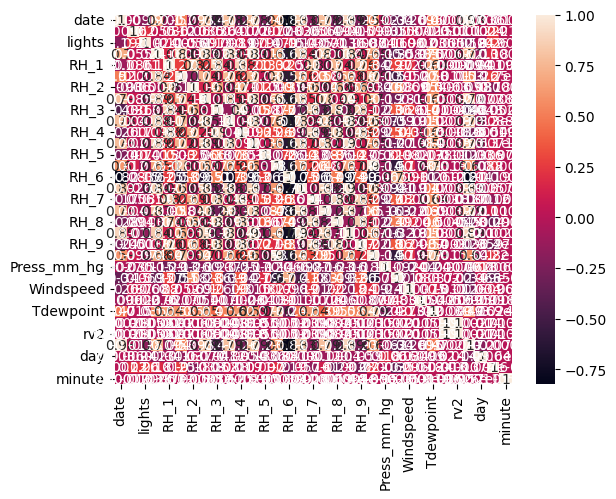

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

Identify correlations between different variables.

### 9. Time series plot for T_out over time:

<Axes: xlabel='date'>

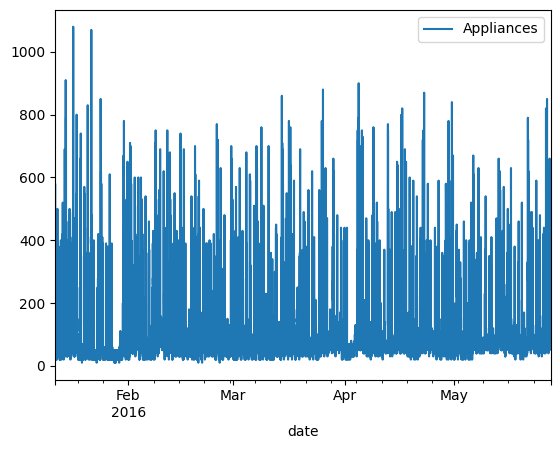

In [16]:
df.plot(x='date', y='Appliances', kind='line')

Observe outdoor temperature trends.

### 10.Line plot for Pressure (Press_mm_hg) over time:

A line plot for Pressure (Press_mm_hg) over time reveals fluctuations in atmospheric pressure

<Axes: xlabel='date'>

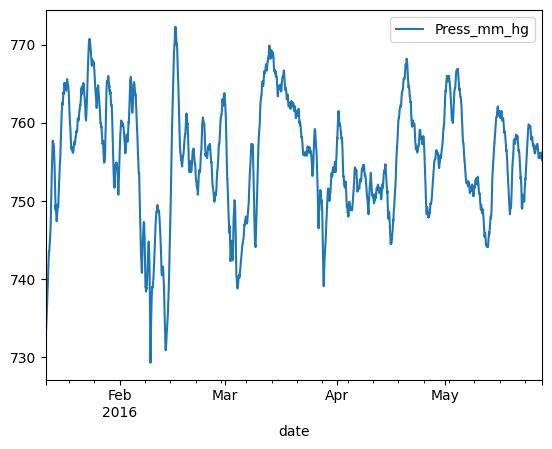

In [17]:
df.plot(x='date', y='Press_mm_hg', kind='line')


### 11. Line plot for Windspeed:

<Axes: >

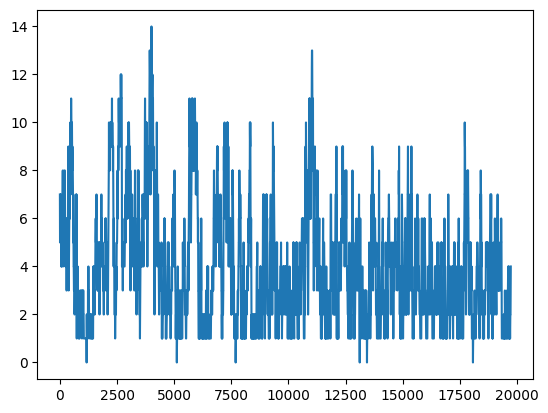

In [18]:
df['Windspeed'].plot(kind='line')

 The scatter plot shows the distribution of windspeed values. You can see the range of speeds and their frequencies.

### 12. Scatter plot for Visibility vs. Tdewpoint:

<Axes: xlabel='Visibility', ylabel='Tdewpoint'>

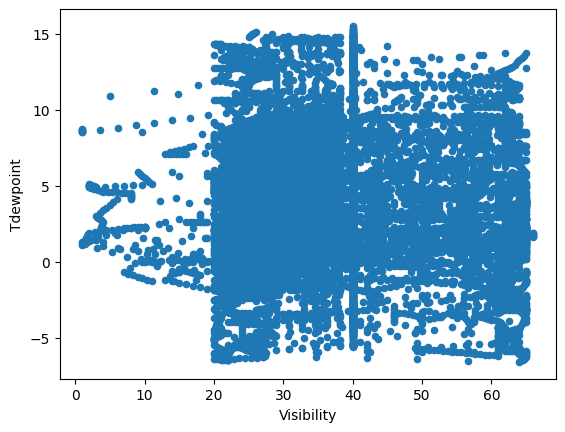

In [19]:
df.plot(x='Visibility', y='Tdewpoint', kind='scatter')

Explore the relationship between outdoor temperature and energy usage.

### 13. Time series plot for RH_out over time:

<Axes: xlabel='date'>

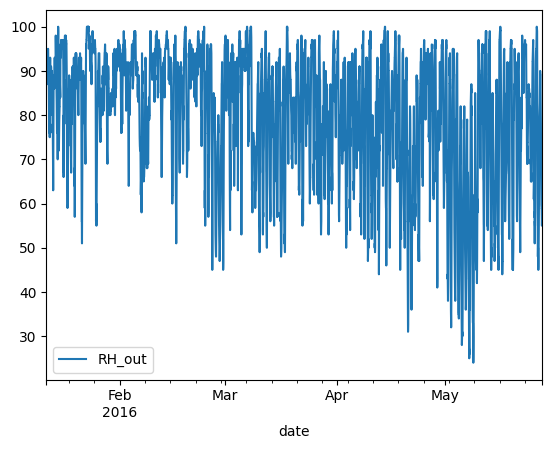

In [20]:
df.plot(x='date', y='RH_out', kind='line')

Observe outdoor temperature trends.

### 14. Box plot for Humidity in different rooms (RH_1 to RH_9):

<Axes: >

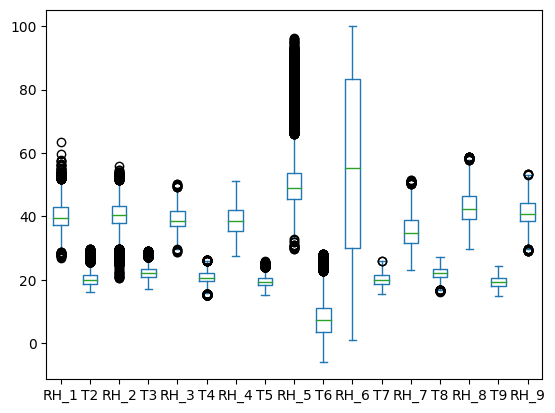

In [21]:
df.loc[:, 'RH_1':'RH_9'].plot(kind='box')

Investigate the distribution of humidity in different areas.

### 15. Histogram plot for Visibility:

<Axes: ylabel='Frequency'>

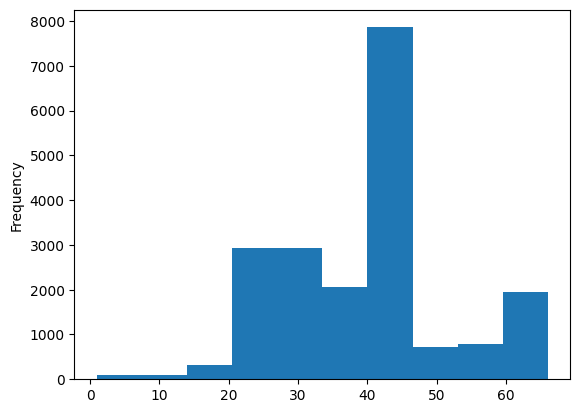

In [22]:
df['Visibility'].plot(kind='hist')

Analyze the distribution of visibility values.

### 16. Line plot for Appliances energy consumption over time:

<Axes: xlabel='date'>

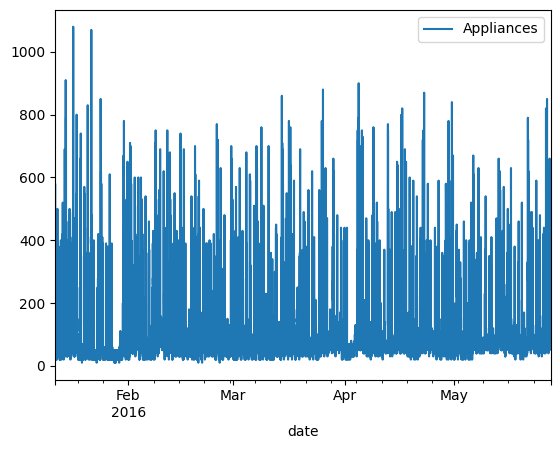

In [23]:
df.plot(x='date', y='Appliances', kind='line')

### 17. Pie chart for the distribution of Lights:

<Axes: ylabel='count'>

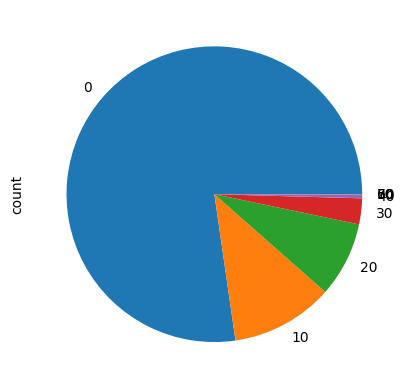

In [24]:
df['lights'].value_counts().plot(kind='pie')

Visualize the proportion of different light energy usage.

### 18. Histogram for T_out:

<Axes: ylabel='Frequency'>

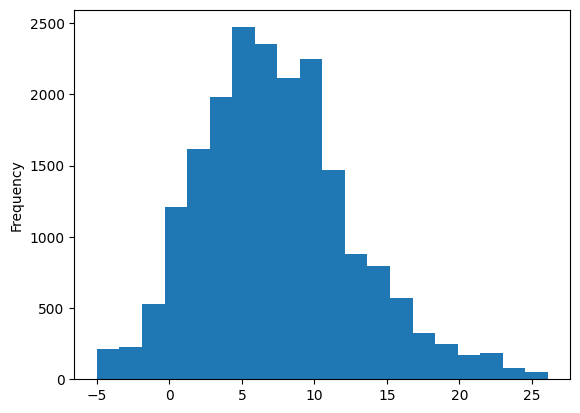

In [25]:
df['T_out'].plot(kind='hist', bins=20)

### 19. Line plot for RH_out over time:

<Axes: xlabel='date'>

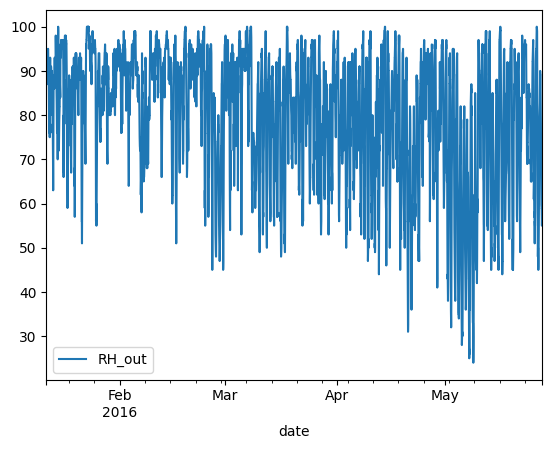

In [26]:
df.plot(x='date', y='RH_out', kind='line')

Understand the distribution of outdoor humidity.

### 20. Line plot for Lights energy consumption over time:

<Axes: xlabel='date'>

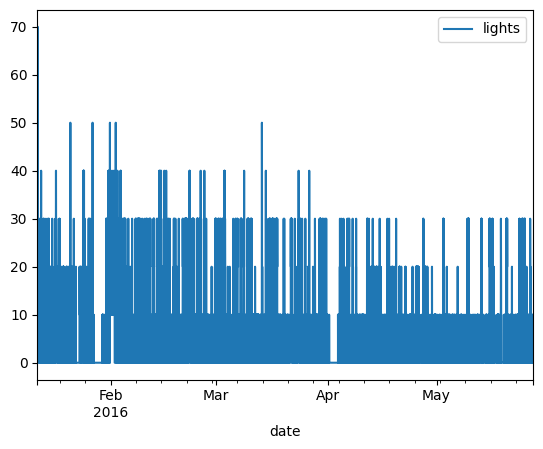

In [27]:
df.plot(x='date', y='lights', kind='line')

### 22. Scatter plot for T2 vs. T3:

<Axes: xlabel='T2', ylabel='T3'>

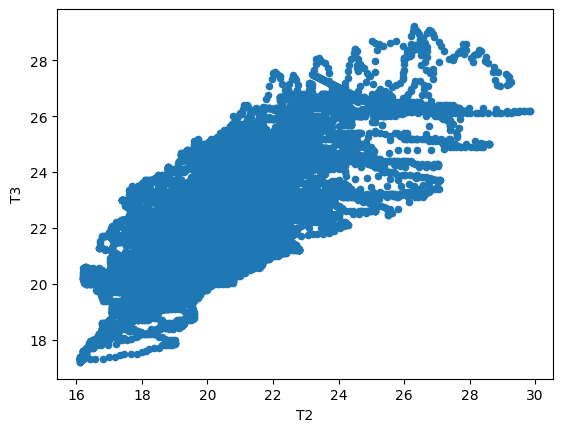

In [28]:
df.plot(x='T2', y='T3', kind='scatter')

Explore the relationship between two temperature variables.

### 23. Box plot for RH values (RH_1 to RH_9):

<Axes: >

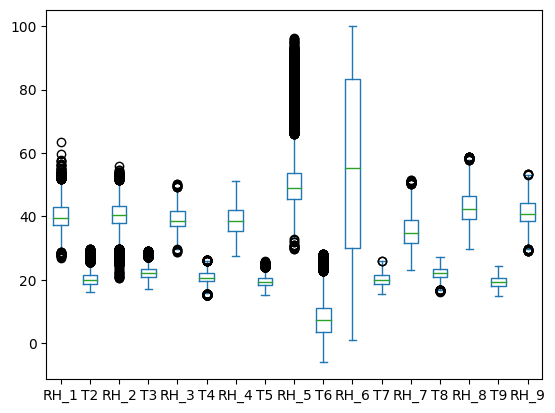

In [29]:
df.loc[:, 'RH_1':'RH_9'].plot(kind='box')

Investigate the distribution of humidity in different areas.

### 23. Histogram plot for Visibility:

<Axes: ylabel='Frequency'>

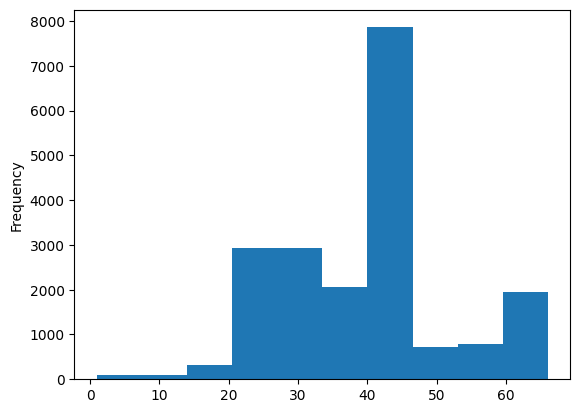

In [30]:
df['Visibility'].plot(kind='hist')

Analyze the distribution of visibility values.

### 24. Line plot for Lights energy consumption over time:

<Axes: xlabel='date'>

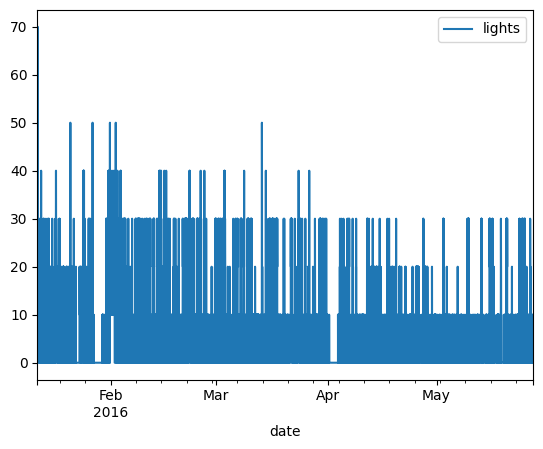

In [31]:
df.plot(x='date', y='lights', kind='line')

### 25.Time series plot for T_out over time:

<Axes: xlabel='date'>

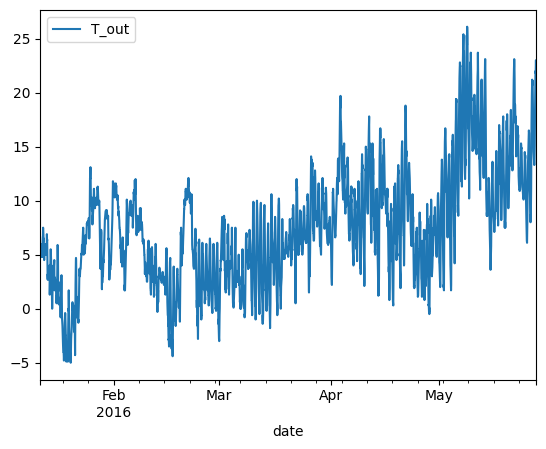

In [32]:
df.plot(x='date', y='T_out', kind='line')

Observe outdoor temperature trends.

### 26. Line plot for RH values (RH_1 to RH_9):

<Axes: >

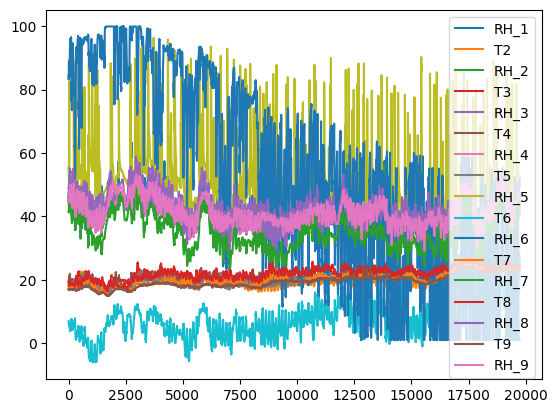

In [33]:
df.loc[:, 'RH_1':'RH_9'].plot(kind='line')

### 27. Pairplot for a subset of columns:

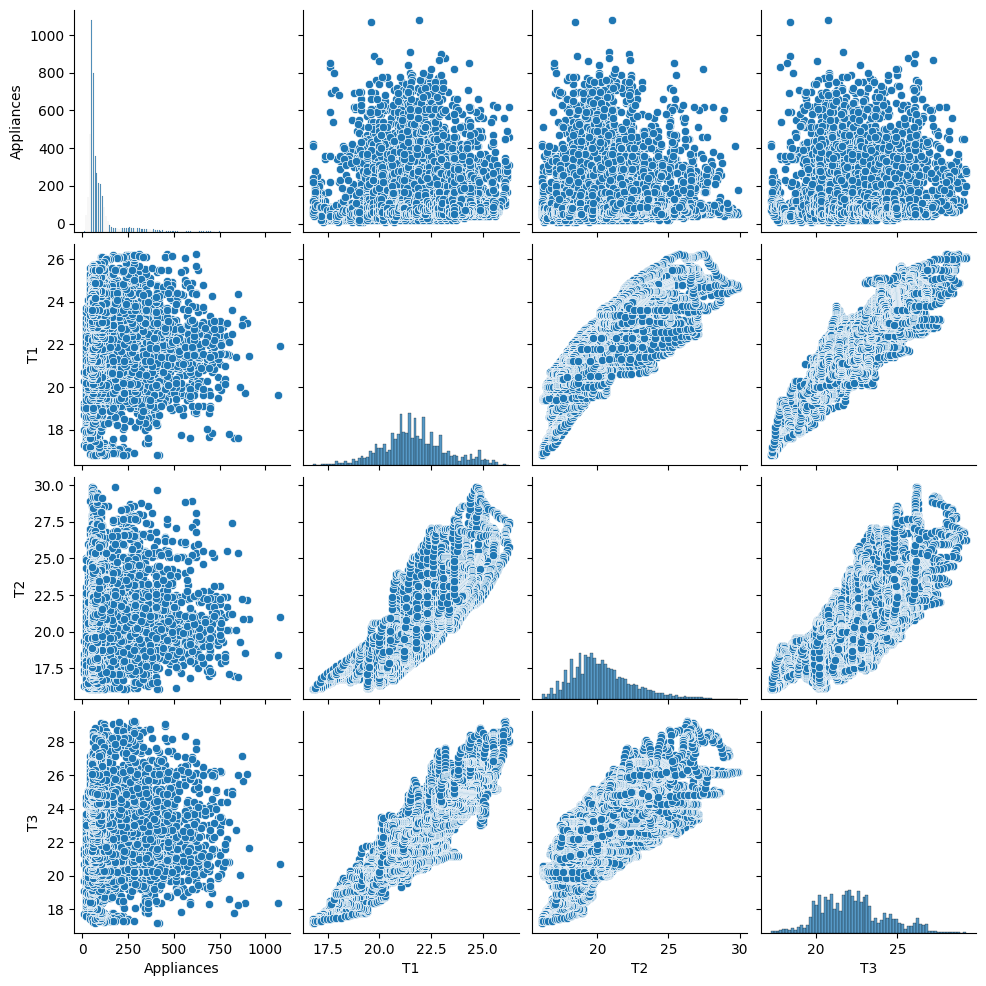

In [34]:
sns.pairplot(df[['Appliances', 'T1', 'T2', 'T3']])

Explore pairwise relationships between these temprature columns.

### 28.  For Random Variable 1

#### Calculate the probability that rv1 takes a value greater than 5.

* Define the Distribution Parameters
Assuming rv1 follows a normal distribution with a given mean (mu) and standard deviation (sigma), you should specify these parameters

In [35]:
mu = 10  # Mean
sigma = 2  # Standard Deviation

* Calculate Probability
To calculate the probability that rv1 takes a value greater than 5, you can use the cumulative distribution function (CDF) of the normal distribution.

In [36]:
probability_greater_than_5 = 1 - norm.cdf(5, loc=mu, scale=sigma)

* Visualize the Data
To visualize your dataset, you can generate a probability density function (PDF) plot of the normal distribution. This will provide a visual representation of the distribution.

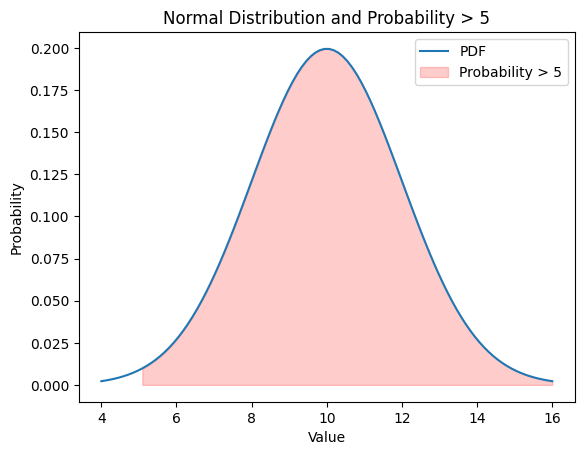

In [37]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, pdf, label='PDF')
plt.fill_between(x, pdf, where=(x > 5), color='red', alpha=0.2, label='Probability > 5')
plt.legend()
plt.title('Normal Distribution and Probability > 5')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()


# Conclusion

1. **Date**: This column likely represents the date and time of data recording, which can be valuable for time series analysis and understanding how the other variables change over time.

2. **Appliances**: This column probably represents energy consumption by appliances. You can analyze it to understand patterns in appliance usage and its impact.

3. **Lights**: This column likely indicates energy usage for lighting. Examining it can reveal when lights are typically on or off.

4. **T1 to T9**: These columns are associated with temperature measurements in different areas or rooms (T1 is typically the kitchen, T2 is a different room, and so on). Analyzing these can help identify temperature trends in various locations.

5. **RH_1 to RH_9**: Similar to the temperature columns, these columns represent relative humidity in different areas. You can use them to study humidity variations.

6. **T_out**: This column likely represents the outdoor temperature. It's important for understanding the relationship between indoor and outdoor temperatures.

7. **Press_mm_hg**: This column may indicate atmospheric pressure, which can have implications for weather-related analyses.

8. **RH_out**: Represents outdoor relative humidity, useful for weather-related insights.

9. **Windspeed**: This column is likely the wind speed, which can be informative for understanding the effects of wind on indoor conditions.

10. **Visibility**: Indicates visibility conditions and can be relevant for various analyses.

11. **Tdewpoint**: Represents the dew point temperature, which is essential for studying humidity levels.

12. **rv1 and rv2**: These columns appear to be some form of variables. Their exact meaning may require further investigation of the dataset documentation.

These conclusions provide an initial overview of the dataset columns and their potential significance in your analysis. Further exploration and data analysis will yield more insights based on your specific research or objectives.